# Training WideResNet on Cifar10 using ADAM

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/DL_project/
!pwd

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1rxvBmpHEy23c0WZ6V3NFhmsmCCJ4quW5/DL_project
/content/drive/.shortcut-targets-by-id/1rxvBmpHEy23c0WZ6V3NFhmsmCCJ4quW5/DL_project


In [ ]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.datasets import CIFAR100
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import *
import os
import time
import gc
import shutil
import h5py

from dfw.dfw import DFW
from dfw.dfw.losses import set_smoothing_enabled
from dfw.dfw.losses import MultiClassHingeLoss
from dfw.experiments.models.densenet import DenseNet3
from dfw.experiments.models.wide_resnet import WideResNet

from train_utils import *

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
os.makedirs("data/cifar", exist_ok=True)
train_dataset_10 = CIFAR10(root='data/cifar', download=True, transform=transform)
test_dataset_10 = CIFAR10(root='data/cifar', train=False, transform=transform)
print(len(train_dataset_10), len(test_dataset_10))

train_dataset_100 = CIFAR100(root='data/cifar', download=True, transform=transform)
test_dataset_100 = CIFAR100(root='data/cifar', train=False, transform=transform)
print(len(train_dataset_100), len(test_dataset_100))

Files already downloaded and verified
50000 10000
Files already downloaded and verified
50000 10000


cuda Tesla P100-PCIE-16GB
Epoch:0   Loss:1.356   Val loss:1.269   Accuracy:56.566   Best val loss:1.269   Time taken:95.736
Epoch:1   Loss:0.909   Val loss:1.298   Accuracy:58.94   Best val loss:1.269   Time taken:96.294
Epoch:2   Loss:0.709   Val loss:0.741   Accuracy:74.535   Best val loss:0.741   Time taken:96.465
Epoch:3   Loss:0.588   Val loss:0.665   Accuracy:77.037   Best val loss:0.665   Time taken:96.017
Epoch:4   Loss:0.491   Val loss:0.646   Accuracy:77.848   Best val loss:0.646   Time taken:95.265
Epoch:5   Loss:0.434   Val loss:0.551   Accuracy:80.518   Best val loss:0.551   Time taken:95.34
Epoch:6   Loss:0.374   Val loss:0.604   Accuracy:79.46   Best val loss:0.551   Time taken:95.366
Epoch:7   Loss:0.335   Val loss:0.6   Accuracy:80.785   Best val loss:0.551   Time taken:95.563
Epoch:8   Loss:0.293   Val loss:0.589   Accuracy:81.023   Best val loss:0.551   Time taken:96.249
Epoch:9   Loss:0.258   Val loss:0.477   Accuracy:84.266   Best val loss:0.477   Time taken:96.464

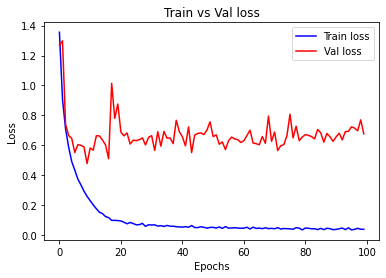

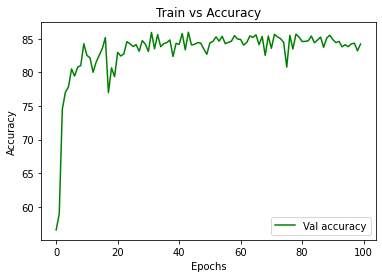

Best epoch: 9


In [ ]:
=trainer = Net_Trainer(device, 'wrn', 'wrn_adam_c10', train_dataset_10, test_dataset_10, lr=1e-3, optm='adam', loss='ce', batch_size=128, epochs=100, 
                      weight_decay=1e-4, smooth=False)
best_epoch, losses, errors, accs = trainer.train()
plot_train(losses, errors, accs)
print('Best epoch:',best_epoch)